## Ben Gurion Aairport Data

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt

In [2]:
import requests
import json


#### Loadding flights data and learning it 

In [3]:
r = requests.get("https://data.gov.il/api/3/action/datastore_search?resource_id=e83f763b-b7d7-479e-b172-ae981ddc6de5&limit=5000")

In [4]:
res = json.loads(r.content)

In [5]:
flights = pd.DataFrame(res['result']['records'])

In [6]:
flights.head(3)

,_id,CHOPER,CHFLTN,CHOPERD,CHSTOL,CHPTOL,CHAORD,CHLOC1,CHLOC1D,CHLOC1TH,CHLOC1T,CHLOC1CH,CHLOCCT,CHTERM,CHCINT,CHCKZN,CHRMINE,CHRMINH
0,1,W6,2326,WIZZAIR,2023-06-14T10:55:00,2023-06-14T11:33:00,D,BUD,BUDAPEST,בודפשט,BUDAPEST,הונגריה,HUNGARY,1,312-320,A,DEPARTED,המריאה
1,2,6H,582,ISRAIR AIRLINES,2023-06-14T11:40:00,2023-06-14T11:35:00,A,LCA,LARNACA,לרנקה,LARNACA,קפריסין,CYPRUS,3,None,None,LANDED,נחתה
2,3,PC,792,PEGASUS AIRLINES,2023-06-14T10:55:00,2023-06-14T11:42:00,D,AYT,ANTALYA,אנטליה,ANTALYA,טורקיה,TURKEY,1,355-360,C,DEPARTED,המריאה


In [7]:
flights.tail(3)

,_id,CHOPER,CHFLTN,CHOPERD,CHSTOL,CHPTOL,CHAORD,CHLOC1,CHLOC1D,CHLOC1TH,CHLOC1T,CHLOC1CH,CHLOCCT,CHTERM,CHCINT,CHCKZN,CHRMINE,CHRMINH
2654,2655,D8,3790,NORWEGIAN AIR SHUTTLE,2023-06-18T11:30:00,2023-06-18T11:30:00,A,CPH,COPENHAGEN KASTRUP,קופנהאגן,COPENHAGEN,דנמרק,DENMARK,3,None,None,NOT FINAL,לא סופי
2655,2656,VS,4005,VIRGIN ATLANTIC AIRWAYS,2023-06-18T11:30:00,2023-06-18T11:30:00,D,ATL,ATLANTA,אטלנטה,ATLANTA,ארצות הברית,UNITED STATES,3,45-55,B,ON TIME,בזמן
2656,2657,XC,441,CORONDON AIRLINES,2023-06-18T11:30:00,2023-06-18T11:30:00,A,AYT,ANTALYA,אנטליה,ANTALYA,טורקיה,TURKEY,3,None,None,NOT FINAL,לא סופי


In [8]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2657 entries, 0 to 2656
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   _id       2657 non-null   int64 
 1   CHOPER    2657 non-null   object
 2   CHFLTN    2657 non-null   object
 3   CHOPERD   2657 non-null   object
 4   CHSTOL    2657 non-null   object
 5   CHPTOL    2657 non-null   object
 6   CHAORD    2657 non-null   object
 7   CHLOC1    2657 non-null   object
 8   CHLOC1D   2657 non-null   object
 9   CHLOC1TH  2657 non-null   object
 10  CHLOC1T   2657 non-null   object
 11  CHLOC1CH  2657 non-null   object
 12  CHLOCCT   2657 non-null   object
 13  CHTERM    2657 non-null   object
 14  CHCINT    1338 non-null   object
 15  CHCKZN    1338 non-null   object
 16  CHRMINE   2657 non-null   object
 17  CHRMINH   2657 non-null   object
dtypes: int64(1), object(17)
memory usage: 373.8+ KB


In [9]:
flights.columns

Index(['_id', 'CHOPER', 'CHFLTN', 'CHOPERD', 'CHSTOL', 'CHPTOL', 'CHAORD',
       'CHLOC1', 'CHLOC1D', 'CHLOC1TH', 'CHLOC1T', 'CHLOC1CH', 'CHLOCCT',
       'CHTERM', 'CHCINT', 'CHCKZN', 'CHRMINE', 'CHRMINH'],
      dtype='object')

In [10]:
flights.CHOPER.unique()

array(['W6', '6H', 'PC', 'IZ', 'FR', 'AM', 'AR', 'B6', 'LY', 'TK', 'BZ',
       'EK', 'FZ', 'EY', 'EJU', 'UA', 'LO', 'AC', 'DL', 'VS', 'A4', 'A3',
       'CY', 'H4', 'HM', 'UX', 'NH', 'OS', 'EZY', 'QS', 'AF', 'BA', 'HU',
       'FB', 'JU', 'AA', 'U8', '6E', 'LH', 'SN', 'AZ', 'IB', 'TP', 'AT',
       'NO', 'TO', 'I2', 'VY', 'LX', 'RJ', 'W4', 'MS', 'HV', 'S7', 'WZ',
       'A9', 'KE', 'ET', 'W9', 'QF', 'H7', 'TG', 'VN', 'RO', 'AY', 'XC',
       'KL', 'OK', 'LA', 'CX', 'HY', 'XQ', '5W', 'J2', 'XR', 'SM', 'GF',
       'FH', 'EZS', 'TWI', 'BUC', '5F', 'D8', 'AI', 'MNE', 'BT', '2S',
       'KM'], dtype=object)

In [11]:
flights.CHOPER.nunique()

88

In [12]:
flights.CHOPERD.unique()

array(['WIZZAIR', 'ISRAIR AIRLINES', 'PEGASUS AIRLINES',
       'ARKIA  ISRAELI  AIRLINES', 'RYANAIR', 'AERO MEXICO',
       'AEROLINEAS ARGENTINAS S.A.', 'JETBLUE AIRWAYS CORPORATION',
       'EL AL ISRAEL AIRLINES', 'TURKISH AIRLINES', 'BLUE BIRD AIRWAYS',
       'EMIRATES', 'FLYDUBAI', 'ETIHAD AIRWAYS', 'EASYJET EUROPE AIRLINE',
       'UNITED AIRLINES', 'LOT POLISH AIRLINES', 'AIR CANADA',
       'DELTA AIRLINES', 'VIRGIN ATLANTIC AIRWAYS', 'AZIMUTH AIRLINES',
       'AEGEAN  AIRLINES', 'CYPRUS AIRWAYS', 'HISKY EUROPE SRL',
       'AIR SEYCHELLES', 'AIR EUROPA Lineas Aereas S.A.U',
       'ALL NIPPON AIRWAYS', 'AUSTRIAN AIRLINES', 'EASYJET', 'SMARTWINGS',
       'AIR FRANCE', 'BRITISH AIRWAYS PLC', 'HAINAN AIRLINES',
       'BULGARIA  AIR', 'AIR SERBIA', 'AMERICAN AIRLINES', 'TUS AIRWAYS',
       'INDIGO AIRLINES', 'LUFTHANSA', 'BRUSSELS AIRLINES',
       'ITALIA TRASPORTO AEREO', 'IBERIA', 'AIR PORTUGAL',
       'ROYAL AIR MAROC', 'NEOS', 'TRANSAVIA FRANCE', 'IBERIA EXPRESS',
    

In [13]:
flights.CHOPERD.nunique()

88

In [14]:
flights.CHAORD.unique()

array(['D', 'A'], dtype=object)

In [15]:
flights.CHLOC1.nunique()

130

##### Display the first rows 

In [16]:
flights.head(1)

,_id,CHOPER,CHFLTN,CHOPERD,CHSTOL,CHPTOL,CHAORD,CHLOC1,CHLOC1D,CHLOC1TH,CHLOC1T,CHLOC1CH,CHLOCCT,CHTERM,CHCINT,CHCKZN,CHRMINE,CHRMINH
0,1,W6,2326,WIZZAIR,2023-06-14T10:55:00,2023-06-14T11:33:00,D,BUD,BUDAPEST,בודפשט,BUDAPEST,הונגריה,HUNGARY,1,312-320,A,DEPARTED,המריאה


##### Last 10 rows - There is no problem at Flights DF

In [17]:
flights.tail(10)

,_id,CHOPER,CHFLTN,CHOPERD,CHSTOL,CHPTOL,CHAORD,CHLOC1,CHLOC1D,CHLOC1TH,CHLOC1T,CHLOC1CH,CHLOCCT,CHTERM,CHCINT,CHCKZN,CHRMINE,CHRMINH
2647,2648,TK,7709,TURKISH AIRLINES,2023-06-18T11:15:00,2023-06-18T11:15:00,D,SAW,ISTANBUL-SABIHA GOKCHEN,איסטנבול,ISTANBUL,טורקיה,TURKEY,3,G1-G11,G,ON TIME,בזמן
2648,2649,H4,236,HISKY EUROPE SRL,2023-06-18T11:20:00,2023-06-18T11:20:00,D,OTP,BUCHAREST - OTOPENI,בוקרשט,BUCHAREST,רומניה,ROMANIA,3,G16-G18,G,ON TIME,בזמן
2649,2650,TK,7668,TURKISH AIRLINES,2023-06-18T11:20:00,2023-06-18T11:20:00,A,AYT,ANTALYA,אנטליה,ANTALYA,טורקיה,TURKEY,3,None,None,NOT FINAL,לא סופי
2650,2651,6H,884,ISRAIR AIRLINES,2023-06-18T11:20:00,2023-06-18T11:20:00,A,BUS,BATUMI,בטומי,BATUMI,גיאורגיה,GEORGIA,3,None,None,NOT FINAL,לא סופי
2651,2652,IZ,2824,ARKIA ISRAELI AIRLINES,2023-06-18T11:25:00,2023-06-18T11:25:00,A,ETM,RAMON,אילת - רמון,RAMON,ישראל,ISRAEL,1,None,None,NOT FINAL,לא סופי
2652,2653,W6,2679,WIZZAIR,2023-06-18T11:25:00,2023-06-18T11:25:00,D,JMK,MIKONOS,מיקונוס,MYKONOS,יוון,GREECE,1,312-320,A,ON TIME,בזמן
2653,2654,DL,249,DELTA AIRLINES,2023-06-18T11:30:00,2023-06-18T11:30:00,D,ATL,ATLANTA,אטלנטה,ATLANTA,ארצות הברית,UNITED STATES,3,45-55,B,ON TIME,בזמן
2654,2655,D8,3790,NORWEGIAN AIR SHUTTLE,2023-06-18T11:30:00,2023-06-18T11:30:00,A,CPH,COPENHAGEN KASTRUP,קופנהאגן,COPENHAGEN,דנמרק,DENMARK,3,None,None,NOT FINAL,לא סופי
2655,2656,VS,4005,VIRGIN ATLANTIC AIRWAYS,2023-06-18T11:30:00,2023-06-18T11:30:00,D,ATL,ATLANTA,אטלנטה,ATLANTA,ארצות הברית,UNITED STATES,3,45-55,B,ON TIME,בזמן
2656,2657,XC,441,CORONDON AIRLINES,2023-06-18T11:30:00,2023-06-18T11:30:00,A,AYT,ANTALYA,אנטליה,ANTALYA,טורקיה,TURKEY,3,None,None,NOT FINAL,לא סופי


##### Percentage of Nulls for each columns 

In [18]:
flights.isnull().sum()

_id            0
CHOPER         0
CHFLTN         0
CHOPERD        0
CHSTOL         0
CHPTOL         0
CHAORD         0
CHLOC1         0
CHLOC1D        0
CHLOC1TH       0
CHLOC1T        0
CHLOC1CH       0
CHLOCCT        0
CHTERM         0
CHCINT      1319
CHCKZN      1319
CHRMINE        0
CHRMINH        0
dtype: int64

In [19]:
flights.isnull()

,_id,CHOPER,CHFLTN,CHOPERD,CHSTOL,CHPTOL,CHAORD,CHLOC1,CHLOC1D,CHLOC1TH,CHLOC1T,CHLOC1CH,CHLOCCT,CHTERM,CHCINT,CHCKZN,CHRMINE,CHRMINH
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2652,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2653,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2654,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
2655,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [20]:

flights.isnull().sum() * 100 / len(flights)


_id          0.000000
CHOPER       0.000000
CHFLTN       0.000000
CHOPERD      0.000000
CHSTOL       0.000000
CHPTOL       0.000000
CHAORD       0.000000
CHLOC1       0.000000
CHLOC1D      0.000000
CHLOC1TH     0.000000
CHLOC1T      0.000000
CHLOC1CH     0.000000
CHLOCCT      0.000000
CHTERM       0.000000
CHCINT      49.642454
CHCKZN      49.642454
CHRMINE      0.000000
CHRMINH      0.000000
dtype: float64

##### Dropping rows that have Null

In [21]:
flights.dropna(inplace = True)

In [22]:
flights.shape


(1338, 18)

##### Format current day 

In [23]:
current_date = dt.datetime.now().strftime("%d_%m_%y")
print("Today =", current_date)

Today = 15_06_23


##### Drop ID column

In [24]:
flights.drop('_id', axis=1, inplace=True)

##### Saving into csv file 

In [25]:
filename = current_date+ ' ' + 'Flights' + '.csv'
flights.to_csv(filename, index=False)

##### Display only airline code and name columns without duplicates

In [26]:
airline_df = flights[['CHOPER','CHOPERD']].drop_duplicates()


In [27]:
airline_df

,CHOPER,CHOPERD
0,W6,WIZZAIR
2,PC,PEGASUS AIRLINES
6,6H,ISRAIR AIRLINES
15,FR,RYANAIR
18,TK,TURKISH AIRLINES
...,...,...
1135,AI,AIR INDIA
1309,MNE,TOMONTENEGRO
1381,BT,AIR BALTIC
1562,2S,SOUTWIND AIRLINES


##### Download airlines

In [28]:
os.chdir ('C:\\Users\\shlomit\\Desktop\\Data sets\\Python project')
airlines = pd.read_csv ('airlines.csv')

In [29]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   CHOPER   100 non-null    object
 1   CHOPERD  100 non-null    object
dtypes: object(2)
memory usage: 1.7+ KB


##### merge and save airline DF to file 

In [30]:
airlines =  pd.concat ([airlines,airline_df])

In [31]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188 entries, 0 to 1932
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   CHOPER   188 non-null    object
 1   CHOPERD  188 non-null    object
dtypes: object(2)
memory usage: 4.4+ KB


In [32]:
filename = current_date + ' ' + 'Airlines' + '.csv'
airlines.to_csv(filename, index=False)

##### Droping Airline name column

In [33]:
flights = flights.drop('CHOPERD', axis=1)

In [34]:
flights.columns

Index(['CHOPER', 'CHFLTN', 'CHSTOL', 'CHPTOL', 'CHAORD', 'CHLOC1', 'CHLOC1D',
       'CHLOC1TH', 'CHLOC1T', 'CHLOC1CH', 'CHLOCCT', 'CHTERM', 'CHCINT',
       'CHCKZN', 'CHRMINE', 'CHRMINH'],
      dtype='object')

##### Airport - same task 

In [35]:
airport_df = flights[['CHLOC1','CHLOC1D']].drop_duplicates()
airport_df.head (3)

,CHLOC1,CHLOC1D
0,BUD,BUDAPEST
2,AYT,ANTALYA
3,NAP,NAPLES-CAPODICHINO


In [36]:
airport = pd.read_csv ('airports.csv')
airport.head (3)

,CHLOC1,CHLOC1D
0,SAW,ISTANBUL-SABIHA GOKCHEN
1,PRG,PRAGUE-RUZYNE
2,IST,ISTANBUL


In [37]:
airport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   CHLOC1   165 non-null    object
 1   CHLOC1D  165 non-null    object
dtypes: object(2)
memory usage: 2.7+ KB


In [38]:
airport =  pd.concat ([airport,airport_df])
airport.info()

<class 'pandas.core.frame.DataFrame'>
Index: 289 entries, 0 to 2188
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   CHLOC1   289 non-null    object
 1   CHLOC1D  289 non-null    object
dtypes: object(2)
memory usage: 6.8+ KB


##### Droping Hebrew columns 

In [39]:
flights = flights.drop (['CHLOC1CH' , 'CHLOC1TH' , 'CHRMINH' ],axis=1)

In [40]:
flights.head(3)

,CHOPER,CHFLTN,CHSTOL,CHPTOL,CHAORD,CHLOC1,CHLOC1D,CHLOC1T,CHLOCCT,CHTERM,CHCINT,CHCKZN,CHRMINE
0,W6,2326,2023-06-14T10:55:00,2023-06-14T11:33:00,D,BUD,BUDAPEST,BUDAPEST,HUNGARY,1,312-320,A,DEPARTED
2,PC,792,2023-06-14T10:55:00,2023-06-14T11:42:00,D,AYT,ANTALYA,ANTALYA,TURKEY,1,355-360,C,DEPARTED
3,W6,8430,2023-06-14T11:05:00,2023-06-14T11:45:00,D,NAP,NAPLES-CAPODICHINO,NAPLES,ITALY,1,312-320,A,DEPARTED


##### Columns rename 

In [41]:
flights.columns

Index(['CHOPER', 'CHFLTN', 'CHSTOL', 'CHPTOL', 'CHAORD', 'CHLOC1', 'CHLOC1D',
       'CHLOC1T', 'CHLOCCT', 'CHTERM', 'CHCINT', 'CHCKZN', 'CHRMINE'],
      dtype='object')

In [42]:
flights = flights.rename (columns = {'CHOPER':'Airline',         'CHFLTN':'FlightNum' ,
                                     'CHSTOL':'PlanTime',        'CHPTOL': 'ActualTime',
                                     'CHAORD':'Direction',       'CHLOC1': 'Airport',
                                     'CHLOC1D': 'Airport Name',  'CHLOC1T': 'City',
                                     'CHLOCCT': 'Country' ,      'CHTERM': 'Terminal',
                                     'CHCINT': 'Sleeve',         'CHCKZN': 'Landing strip',
                                     'CHRMINE':'Status' })

In [43]:
flights.columns

Index(['Airline', 'FlightNum', 'PlanTime', 'ActualTime', 'Direction',
       'Airport', 'Airport Name', 'City', 'Country', 'Terminal', 'Sleeve',
       'Landing strip', 'Status'],
      dtype='object')

##### Changes datetime type

In [44]:
flights.PlanTime = pd.to_datetime(flights.PlanTime)
flights.ActualTime = pd.to_datetime(flights.ActualTime)

In [45]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1338 entries, 0 to 2655
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Airline        1338 non-null   object        
 1   FlightNum      1338 non-null   object        
 2   PlanTime       1338 non-null   datetime64[ns]
 3   ActualTime     1338 non-null   datetime64[ns]
 4   Direction      1338 non-null   object        
 5   Airport        1338 non-null   object        
 6   Airport Name   1338 non-null   object        
 7   City           1338 non-null   object        
 8   Country        1338 non-null   object        
 9   Terminal       1338 non-null   object        
 10  Sleeve         1338 non-null   object        
 11  Landing strip  1338 non-null   object        
 12  Status         1338 non-null   object        
dtypes: datetime64[ns](2), object(11)
memory usage: 146.3+ KB


##### Saving DF to Clean Data file

In [46]:
filename = current_date+ ' ' + 'Clean' + '.csv'
flights.to_csv(filename, index=False)

##### Preparing Final data and save as new file 

In [47]:
final = pd.read_csv ('final.csv')
final.columns 

Index(['Airline', 'FlightNum', 'PlanTime', 'ActualTime', 'Direction',
       'Airport', 'City', 'Country', 'Terminal', 'Status'],
      dtype='object')

In [48]:
flights.columns

Index(['Airline', 'FlightNum', 'PlanTime', 'ActualTime', 'Direction',
       'Airport', 'Airport Name', 'City', 'Country', 'Terminal', 'Sleeve',
       'Landing strip', 'Status'],
      dtype='object')

In [49]:
flights = flights.drop (['Airport Name' , 'Sleeve' , 'Landing strip' ],axis=1)

In [50]:
flights.columns

Index(['Airline', 'FlightNum', 'PlanTime', 'ActualTime', 'Direction',
       'Airport', 'City', 'Country', 'Terminal', 'Status'],
      dtype='object')

In [51]:
flights.Status.values

array(['DEPARTED', 'DEPARTED', 'DEPARTED', ..., 'ON TIME', 'ON TIME',
       'ON TIME'], dtype=object)

In [52]:
final_df = flights[flights.Status.isin(['LANDED', 'CANCELED'])]

In [53]:
final_df

,Airline,FlightNum,PlanTime,ActualTime,Direction,Airport,City,Country,Terminal,Status
92,AM,7865,2023-06-14 14:55:00,2023-06-14 14:55:00,D,JFK,NEW YORK,UNITED STATES,3,CANCELED
93,AR,7857,2023-06-14 14:55:00,2023-06-14 14:55:00,D,JFK,NEW YORK,UNITED STATES,3,CANCELED
94,B6,6457,2023-06-14 14:55:00,2023-06-14 14:55:00,D,JFK,NEW YORK,UNITED STATES,3,CANCELED
96,LY,011,2023-06-14 14:55:00,2023-06-14 14:55:00,D,JFK,NEW YORK,UNITED STATES,3,CANCELED
718,EK,2370,2023-06-15 11:00:00,2023-06-15 11:00:00,D,DXB,DUBAI,UNITED ARAB EMIRATES,3,CANCELED
719,FZ,1550,2023-06-15 11:00:00,2023-06-15 11:00:00,D,DXB,DUBAI,UNITED ARAB EMIRATES,3,CANCELED


In [54]:
final.shape

(658, 10)

In [55]:
final =  pd.concat ([final,final_df])

In [56]:
final.shape

(664, 10)

In [57]:
filename = current_date+ ' ' + 'final' + '.csv'
final.to_csv(filename, index=False)

##### Add a new column for total delay in minutes

In [58]:
flights['difference_minutes'] = ( flights.ActualTime - flights.PlanTime).dt.total_seconds() / 60

In [59]:
flights.head (3)

,Airline,FlightNum,PlanTime,ActualTime,Direction,Airport,City,Country,Terminal,Status,difference_minutes
0,W6,2326,2023-06-14 10:55:00,2023-06-14 11:33:00,D,BUD,BUDAPEST,HUNGARY,1,DEPARTED,38.0
2,PC,792,2023-06-14 10:55:00,2023-06-14 11:42:00,D,AYT,ANTALYA,TURKEY,1,DEPARTED,47.0
3,W6,8430,2023-06-14 11:05:00,2023-06-14 11:45:00,D,NAP,NAPLES,ITALY,1,DEPARTED,40.0


##### Average delay for departed flights

In [60]:
flights [ flights.Status == 'DEPARTED'].difference_minutes.mean()

37.43490304709141

#####  Total delay for Airlines , Terminals, Date

In [61]:
delay_distribution = flights.groupby(['Airline', 'Terminal'])['difference_minutes'].sum().to_frame()

In [62]:
delay_distribution.head(3)

,,difference_minutes
Airline,Terminal,
2S,3,0.0
5F,3,0.0
5W,3,0.0


In [63]:
delay_distribution.difference_minutes.nlargest()

Airline  Terminal
LY       3           2059.0
W6       1            904.0
FR       1            602.0
TK       3            577.0
B6       3            431.0
Name: difference_minutes, dtype: float64

In [64]:
delay_distribution.difference_minutes.nsmallest()

Airline  Terminal
2S       3           0.0
5F       3           0.0
5W       3           0.0
AI       3           0.0
BT       3           0.0
Name: difference_minutes, dtype: float64

## Create 3 diffrent visualizations with your analyzation

In [65]:
flights.describe()

,PlanTime,ActualTime,difference_minutes
count,1338,1338,1338.000000
mean,2023-06-16 09:10:10.313901312,2023-06-16 09:20:38.968609792,10.477578
min,2023-06-14 10:55:00,2023-06-14 11:33:00,-13.000000
25%,2023-06-15 09:01:15,2023-06-15 09:38:15,0.000000
50%,2023-06-16 06:12:30,2023-06-16 06:12:30,0.000000
75%,2023-06-17 11:13:45,2023-06-17 11:13:45,14.000000
max,2023-06-18 11:30:00,2023-06-18 11:30:00,276.000000
std,NaN,NaN,23.542317


In [66]:
flights.columns

Index(['Airline', 'FlightNum', 'PlanTime', 'ActualTime', 'Direction',
       'Airport', 'City', 'Country', 'Terminal', 'Status',
       'difference_minutes'],
      dtype='object')

#### Is there a connection between the airlines and delay times 

checking delay precantuge  on each airlaine

In [67]:

airline_flights = flights.Airline.value_counts().to_frame().reset_index()
airline_flights.columns = ['Airline', 'TotalFlights'] ## Total flights for each airlain
delay_flights  = flights [flights.difference_minutes != 0].Airline.value_counts().to_frame().reset_index()
delay_flights.columns = ['Airline', 'DelayFlights'] ##  Flights had delay for each airlain

##airline_flights ['delay flights'] = x
##airline_flights .head (50)

In [68]:
delay_flights.shape

(71, 2)

In [69]:
airline_flights.shape

(88, 2)

In [70]:
merged_df = airline_flights.merge(delay_flights, on='Airline',how='left',sort=True)
merged_df.fillna(0, inplace = True)
merged_df = merged_df.sort_values('DelayFlights')

In [71]:
merged_df.corr(numeric_only=True)


,TotalFlights,DelayFlights
TotalFlights,1.000000,0.991901
DelayFlights,0.991901,1.000000


In [72]:
merged_df.describe() ## checking standard deviation

,TotalFlights,DelayFlights
count,88.000000,88.000000
mean,15.204545,4.204545
std,25.861772,8.057493
min,1.000000,0.000000
25%,3.000000,1.000000
50%,6.000000,2.000000
75%,19.250000,5.000000
max,210.000000,67.000000


In [73]:
flights.difference_minutes.value_counts()

difference_minutes
 0.0     968
 27.0     17
 36.0     16
 13.0     14
 32.0     14
        ... 
 79.0      1
 69.0      1
-3.0       1
-13.0      1
 60.0      1
Name: count, Length: 82, dtype: int64

In [74]:
merged_df['Airline_delay_percentage'] = merged_df.DelayFlights/merged_df.TotalFlights*100
merged_df['Flight_delay_percentage'] = merged_df.DelayFlights*100/87

delay = len (flights [flights ['difference_minutes'] == 0.0])
on_time = len (flights [flights ['difference_minutes'] != 0.0])
pie = [delay , on_time]
label = ['Delayed flights'  , 'Flights On_time']

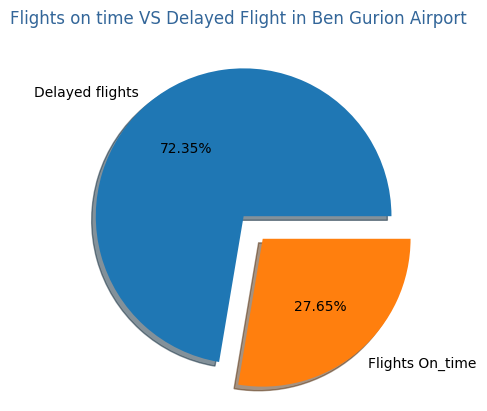

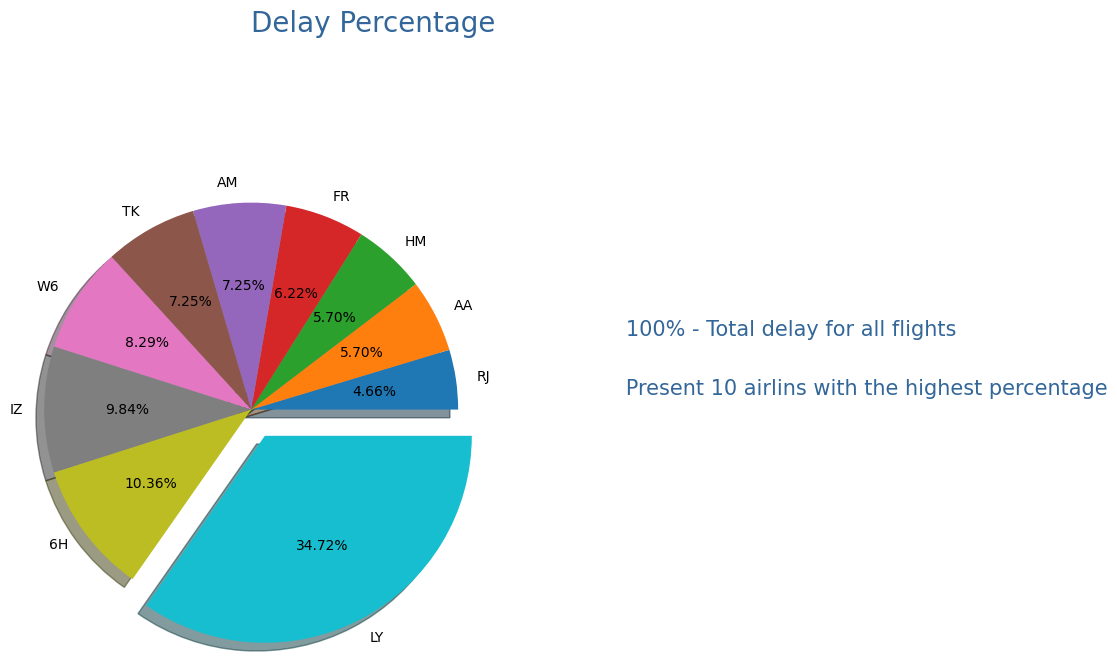

In [75]:

## first pie 
plt.pie ( pie , 
         autopct ='%1.2f%%', shadow = True , explode = (0,0.2) , labels = label)

plt.title("Flights on time VS Delayed Flight in Ben Gurion Airport  ", color = (0.2, 0.4, 0.6),fontsize = 12 )

plt.show()

##secound pie
plt.pie (merged_df['Flight_delay_percentage'].tail(10) , 
         autopct ='%1.2f%%',  shadow = True   , 
        explode = (0,0,0,0,0,0,0,0,0,0.1),
        labels = merged_df.Airline.tail(10),radius=0.7)
plt.title("Delay Percentage",loc='left', color=(0.2, 0.4, 0.6), fontsize=20)

explanations = ['   Present 10 airlins with the highest percentage','',
                '   100% - Total delay for all flights']
for i, expl in enumerate(explanations):
    plt.annotate(expl, (1.2, 0.05 + 0.1*i), fontsize = 15, color = (0.2, 0.4, 0.6))
    

xycoords='axes fraction'
plt.axis(xmin = 0, ymin = 0)

plt.show()

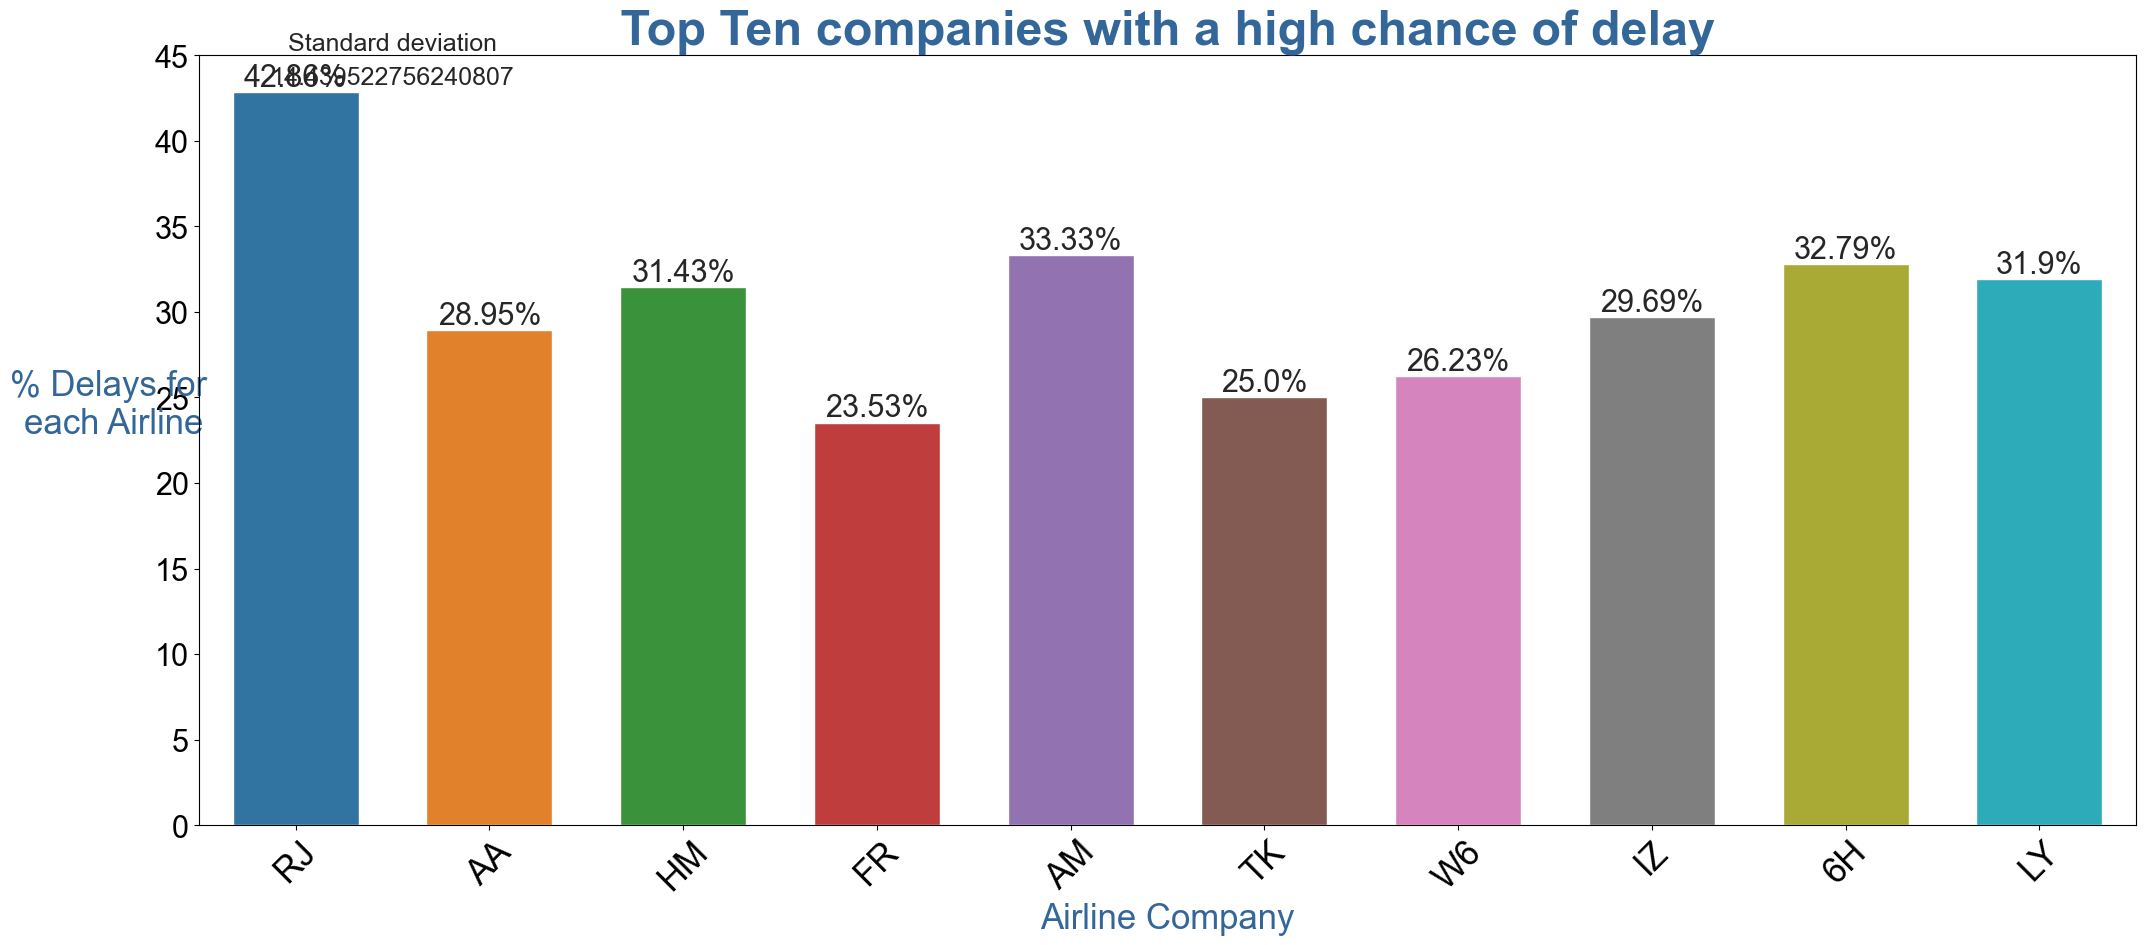

In [76]:
plt.figure(figsize = (25,10))

plt.title(" Top Ten companies with a high chance of delay ", 
          color = (0.2, 0.4, 0.6),fontsize = 35, fontweight = 'bold' )

sb.set_style ("whitegrid")



sb.barplot (x = merged_df.Airline.tail(10) , 
            y = merged_df.Airline_delay_percentage,
            errcolor = (0.2, 0.4, 0.6), width = 0.65 )

plt.text( x=0.5 , y=45 ,s = 'Standard deviation',ha='center',fontsize = 18 ,va='bottom' )      
plt.text( x=0.5 , y=43 ,s = merged_df.Airline_delay_percentage.std() ,ha='center',fontsize = 18 ,va='bottom' )


x = merged_df.Airline.tail(10).to_frame().reset_index(drop = True)
y = merged_df.Airline_delay_percentage.tail(10).to_frame().reset_index(drop = True)
for i in range(len(x)):
   plt.text( x.index[i],
            y.Airline_delay_percentage[i],
           str( round (y.Airline_delay_percentage[i],2))+'%',
            ha='center',fontsize = 22 ,va='bottom') 

     
plt.xlabel ('Airline Company',color = (0.2, 0.4, 0.6) , fontsize = 25)
plt.ylabel ('% Delays for \neach Airline',color = (0.2, 0.4, 0.6), fontsize = 25, rotation = 0, labelpad=30 )
plt.xticks(fontsize=25, rotation=45) 
plt.yticks(fontsize=22)  
plt.show()